In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'D:/EarthMantleConvection/mantle01/spherical001.nc'
netcdf = netCDF4.Dataset(file_path)

In [6]:
d = netcdf['thermal conductivity'][:]
d = d[:30, :30, :30]

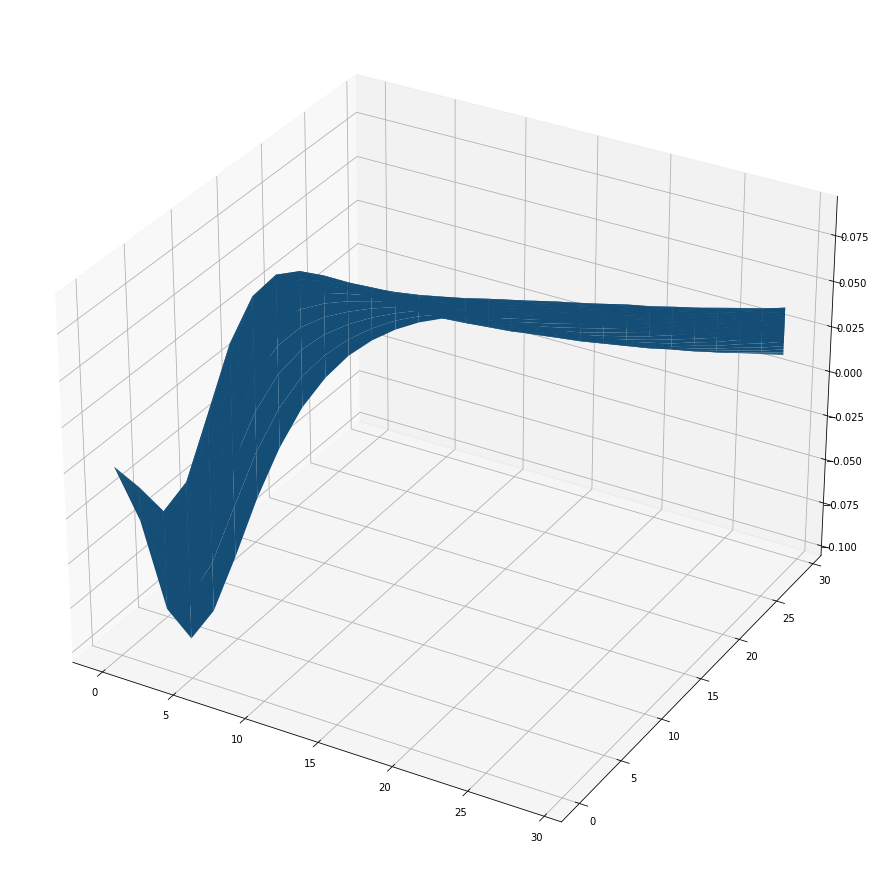

In [28]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(range(30), range(30), d[:, :, 0], alpha=1)
plt.show()